<a href="https://colab.research.google.com/github/ritammondal2004/Breast-cancer-detection-using-Logistic-Regression-with-GridSearchCV/blob/main/Breast_Cancer_Detection_using_Logistic_Regression_and_GridSearchCV_by_Ritam_Mondal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Breast Cancer Wisconsin (Diagnostic) Detection Malignant or Not**
#**detect whether the cancer is benign or malignant using Logistic regression, SVM**
#building the best model using GridSearchCV

It can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

kaggle dataset:
https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data/data

Attribute Information:

1. ID number
2. Diagnosis (M = malignant, B = benign)
3-32)

**Ten real-valued features are computed for each cell nucleus:**

* a) radius (mean of distances from center to points on the perimeter)
* b) texture (standard deviation of gray-scale values)
* c) perimeter
* d) area
* e) smoothness (local variation in radius lengths)
* f) compactness (perimeter^2 / area - 1.0)
* g) concavity (severity of concave portions of the contour)
* h) concave points (number of concave portions of the contour)
* i) symmetry
* j) fractal dimension ("coastline approximation" - 1)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

access the data set

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/data set/breast_cancer.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [ ]:
df.sample(5) # display random 5 rows

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
555,924934,B,10.290,27.61,65.67,321.4,0.09030,0.07658,0.05999,0.027380,...,34.91,69.57,357.6,0.1384,0.1710,0.20000,0.09127,0.2226,0.08283,NaN
61,858981,B,8.598,20.98,54.66,221.8,0.12430,0.08963,0.03000,0.009259,...,27.04,62.06,273.9,0.1639,0.1698,0.09001,0.02778,0.2972,0.07712,NaN
26,852763,M,14.580,21.53,97.41,644.8,0.10540,0.18680,0.14250,0.087830,...,33.21,122.40,896.9,0.1525,0.6643,0.55390,0.27010,0.4264,0.12750,NaN
373,901288,M,20.640,17.35,134.80,1335.0,0.09446,0.10760,0.15270,0.089410,...,23.17,166.80,1946.0,0.1562,0.3055,0.41590,0.21120,0.2689,0.07055,NaN
516,916799,M,18.310,20.58,120.80,1052.0,0.10680,0.12480,0.15690,0.094510,...,26.20,142.20,1493.0,0.1492,0.2536,0.37590,0.15100,0.3074,0.07863,NaN


Getting Information about the dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Get all the columns name

In [ ]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

#**Diagnosis Distribution (Benign vs Malignant)**
This pie chart visualizes the proportion of **benign and malignant** tumor cases in the dataset. The chart shows:

* 62.74% of the cases are benign

* 37.26% of the cases are malignant

A small explode effect is used to highlight the malignant slice for better visibility.



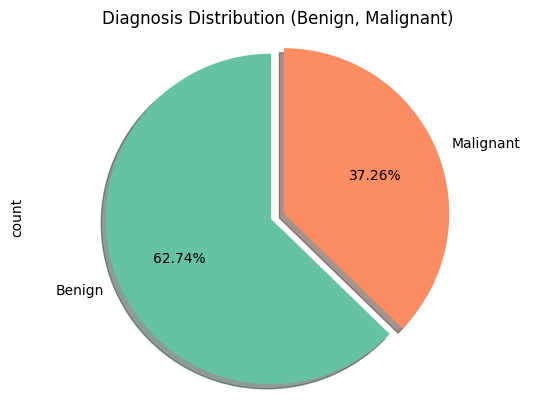

In [ ]:

df['diagnosis'].value_counts().sort_index().plot.pie(startangle=90, autopct='%.2f%%',
                                                    labels=['Benign',"Malignant"],explode=[0,0.085],
                                                     shadow=True,colors= sns.color_palette(palette='Set2'))
plt.title('Diagnosis Distribution (Benign, Malignant)')
plt.axis('equal')
plt.show()

#**3D Scatter Plot: Area vs Concavity vs Smoothness**
This interactive 3D scatter plot visualizes the relationship between three important features:

1. area_mean

2. concavity_mean

3. smoothness_mean

The points are colored based on the diagnosis (Benign=blue or Malignant=yellow), allowing us to visually inspect how the classes are distributed in the 3D feature space.

In [ ]:
import plotly.express as px
fig = px.scatter_3d(df, x='area_mean', y='concavity_mean', z='smoothness_mean', color='diagnosis')
fig.show()

#**Insight**

We observe that malignant tumors tend to cluster in regions with higher area and concavity values, suggesting these features may be strong indicators for classification.

#**Processing**

We are dropping columns - 'id' and 'Unnamed: 32' as they have no role in prediction

In [ ]:
df.drop(['id','Unnamed: 32'],axis=1,inplace=True)
print(df.diagnosis.value_counts())
df.head()

diagnosis
B    357
M    212
Name: count, dtype: int64


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


 Converts the diagnosis column, which contains 'M' (Malignant) and 'B' (Benign) into binary values. 'M' is converted to 1 and 'B' to 0 making it suitable for machine learning

In [ ]:
df['diagnosis'] = df["diagnosis"].map({'M':1, 'B':0})
df['diagnosis'].value_counts()

,count
diagnosis,
0,357
1,212


In [ ]:
#splitting as predictior x and y target variable
x = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']

Showing how much features are collinear with each other

<Figure size 1600x1200 with 0 Axes>

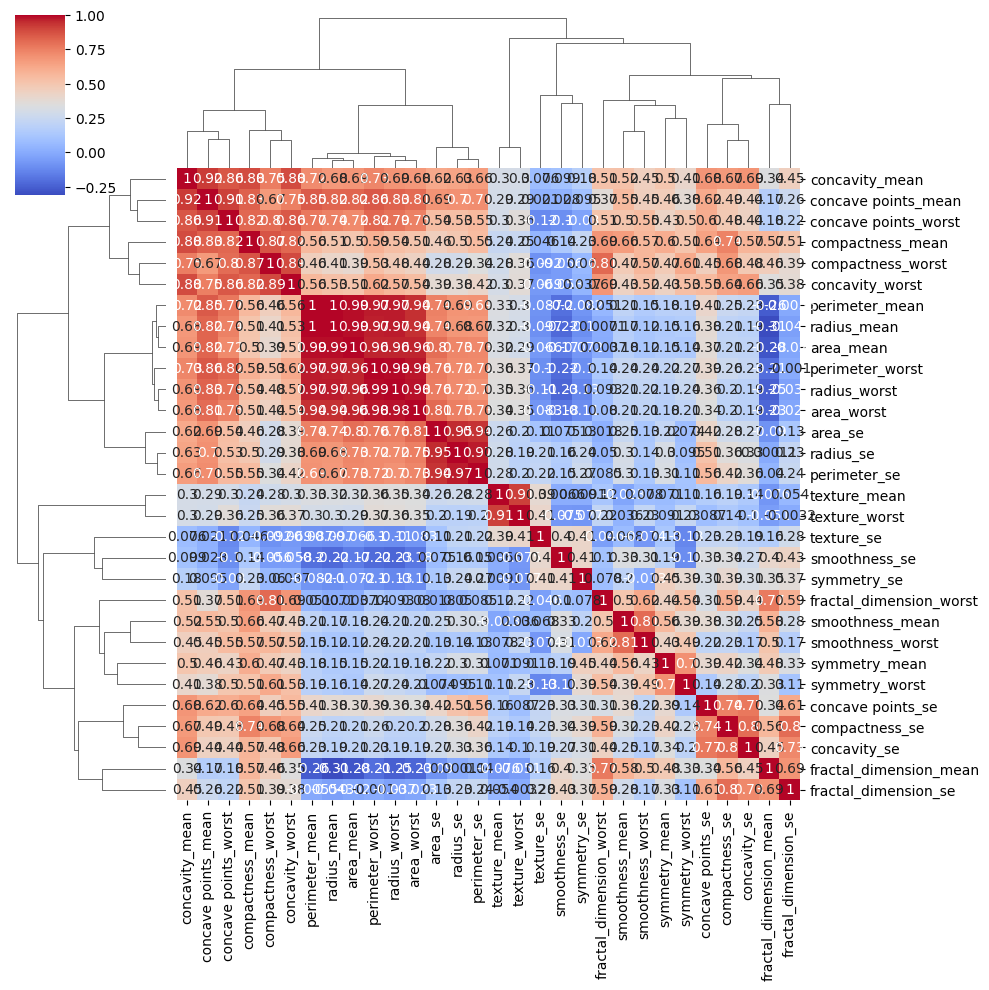

In [ ]:
plt.figure(figsize= (16,12))
sns.clustermap(x.corr(), annot = True, cmap = 'coolwarm')


**Splitting data for training and testing.**

we split the data using train test split with test_size = 0.2
means 20% of the data will be used for testing and 80% for training.


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

print("x train: ", x_train.shape)
print("x test: ", x_test.shape)
print("y train: ", y_train.shape)
print("y test: ", y_test.shape)

x train:  (455, 30)
x test:  (114, 30)
y train:  (455,)
y test:  (114,)


#**import Logistic regression, Support Vector Classifier**

here we aim to compare the performance of two supervised learning algorithms: **Logistic Regression** and **Support Vector Classifier (SVC)**, using GridSearchCV for **hyperparameter tuning** and **cross-validation**.

Since both models are sensitive to the scale of the features, especially SVC, we include feature scaling using StandardScaler as part of a scikit-learn Pipeline. it will keep scaling consistently during cross-validation and hyperparameter tuning.

We then define a param_grid that allows GridSearchCV to:

Switch between Logistic Regression and SVC as the classifier

Tune important hyperparameters for each model:

C, penalty, and solver for Logistic Regression

C and kernel for SVC

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

#create pipeline
pipe = Pipeline(
    [
        ("scaler", StandardScaler()) ,
        ("clf", LogisticRegression()) ,
    ]
)

# Define the parameter grid for both classifiers
params = [
    {
        'clf':[LogisticRegression()],
        'clf__C':[1,2,4,10,20,50] ,
        "clf__solver" : ['lbfgs','liblinear' , 'newton-cg'],
        'clf__penalty':['l2'] , # those solver only support l2 penalty or Lasso
    },
        {
        'clf': [LogisticRegression()],
        'clf__penalty': ['l1'],
        'clf__solver': ['liblinear', 'saga'],  # l1 works only with liblinear and saga
        'clf__C': [0.1, 1, 10, 20]
    },
        {
        'clf': [LogisticRegression()],
        'clf__penalty': ['elasticnet'],
        'clf__solver': ['saga'],  # elasticnet works ONLY with saga
        'clf__l1_ratio': [0.3, 0.5, 0.7],
        'clf__C': [0.1, 1, 10, 20]
    }  ,
    {
        'clf': [SVC()] ,
        'clf__C': [0.1,1,2] ,
        'clf__kernel' : ['rbf','linear','sigmoid']
    }
]

In [ ]:

# Set up GridSearchCV
model_grid = GridSearchCV(pipe,param_grid= params, cv=5, scoring = 'accuracy', verbose =3 )
model_grid.fit(x_train, y_train)


Fitting 5 folds for each of 47 candidates, totalling 235 fits
[CV 1/5] END clf=LogisticRegression(), clf__C=1, clf__penalty=l2, clf__solver=lbfgs;, score=0.967 total time=   0.0s
[CV 2/5] END clf=LogisticRegression(), clf__C=1, clf__penalty=l2, clf__solver=lbfgs;, score=0.967 total time=   0.0s
[CV 3/5] END clf=LogisticRegression(), clf__C=1, clf__penalty=l2, clf__solver=lbfgs;, score=1.000 total time=   0.0s
[CV 4/5] END clf=LogisticRegression(), clf__C=1, clf__penalty=l2, clf__solver=lbfgs;, score=0.956 total time=   0.0s
[CV 5/5] END clf=LogisticRegression(), clf__C=1, clf__penalty=l2, clf__solver=lbfgs;, score=1.000 total time=   0.0s
[CV 1/5] END clf=LogisticRegression(), clf__C=1, clf__penalty=l2, clf__solver=liblinear;, score=0.967 total time=   0.0s
[CV 2/5] END clf=LogisticRegression(), clf__C=1, clf__penalty=l2, clf__solver=liblinear;, score=0.967 total time=   0.0s
[CV 3/5] END clf=LogisticRegression(), clf__C=1, clf__penalty=l2, clf__solver=liblinear;, score=1.000 total tim

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf', LogisticRegression())]),
             param_grid=[{'clf': [LogisticRegression()],
                          'clf__C': [1, 2, 4, 10, 20, 50],
                          'clf__penalty': ['l2'],
                          'clf__solver': ['lbfgs', 'liblinear', 'newton-cg']},
                         {'clf': [LogisticRegression()],
                          'clf__C': [0.1, 1, 10, 20], 'clf__penalty': ['l1'],
                          'clf__solver': ['liblinear', 'saga']},
                         {'clf': [LogisticRegression()],
                          'clf__C': [0.1, 1, 10, 20],
                          'clf__l1_ratio': [0.3, 0.5, 0.7],
                          'clf__penalty': ['elasticnet'],
                          'clf__solver': ['saga']},
                         {'clf': [SVC()], 'clf__C': [0.1, 1, 2],
                          'clf__kernel': ['rbf', 'linear', 'sigmoid']}],
             scoring='accuracy', verbose=3)

#Compute the final model
access final and best model through best_estimator_
and it is LogisticRegression()

In [ ]:
final_model = model_grid.best_estimator_
final_model

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', LogisticRegression(C=1, penalty='l1', solver='saga'))])

access the best parameters with best_params_

In [ ]:
opt_params = model_grid.best_params_  # best parameters  or optimal parameter
opt_params

{'clf': LogisticRegression(),
 'clf__C': 1,
 'clf__penalty': 'l1',
 'clf__solver': 'saga'}

Display the accuracy score

In [ ]:
model_grid.best_score_
# the score is 0.9802

np.float64(0.9802197802197803)

**predict the value on test data**

In [ ]:
y_pred = final_model.predict(x_test)
y_pred

array([1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0])

#**Model Evaluation: Accuracy, Precision, and Recall, confusion amtrix**
Here, we calculate Accuracy, Precision, and Recall — three commonly used classification metrics, especially for medical datasets like **breast cancer detection.**
  
* **Accuracy:** Measures the overall correctness of the model — the percentage of total predictions that are correct. (TP + TN)/(TP+TN+FP+FN)

* **Precision:** Indicates how many of the predicted positive cases were actually positive. High precision means fewer false positives. TP/(TP+FP)

* **Recall (Sensitivity):** Measures how many actual positive cases were correctly identified. High recall means fewer false negatives, which is critical in medical diagnostics. TP/(TP+FN)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_curve , classification_report , recall_score, precision_score

print(f"Accuracy is: {accuracy_score(y_test,y_pred)*100:.2f} %")
print(f"Precision is: {precision_score(y_test,y_pred)*100:.2f} %")
print(f"Recall is: {recall_score(y_test,y_pred)*100:.2f} %")

print("confusion matrix:\n", confusion_matrix(y_test, y_pred))

#   0  1
# 0|__|__|
# 1|  |  |
# this is the format of confusion matrix

Accuracy is: 98.25 %
Precision is: 100.00 %
Recall is: 94.59 %
confusion matrix:
 [[77  0]
 [ 2 35]]


**Display Classification report**

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        77
           1       1.00      0.95      0.97        37

    accuracy                           0.98       114
   macro avg       0.99      0.97      0.98       114
weighted avg       0.98      0.98      0.98       114



#**Confusion Matrix Visualization**
The confusion matrix shows the number of correct and incorrect predictions made by the classifier. It helps to understand the types of errors the model is making — such as false positives (Type I error) and false negatives (Type II error).

In medical applications like cancer detection, **minimizing false negatives** is often critical, so visualizing these outcomes is an important step in evaluating model performance.

 **minimizing false negatives**  is so important in medical diagnostics

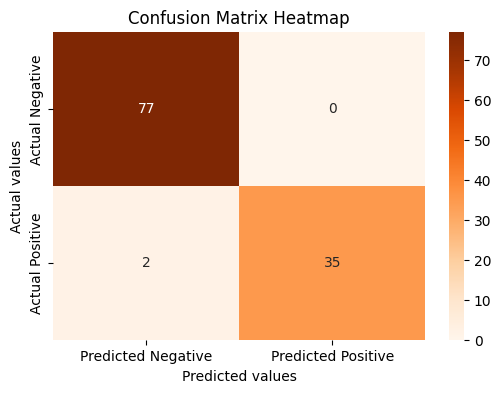

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap with annotations
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.show()

prediction probability of 0 (B) or 1(M)

In [ ]:
y_pred_proba = final_model.predict_proba(x_test)
y_pred_proba[:10]
 # 0th index denotes probability of 0 and 1 index denotes probability of 1
 # which ever is more that will be accepted

array([[1.49574264e-02, 9.85042574e-01],
       [8.36370827e-01, 1.63629173e-01],
       [9.81821467e-01, 1.81785329e-02],
       [9.97032273e-01, 2.96772717e-03],
       [9.10242926e-01, 8.97570739e-02],
       [3.64485424e-05, 9.99963551e-01],
       [5.02520714e-02, 9.49747929e-01],
       [4.07611283e-01, 5.92388717e-01],
       [3.80049062e-06, 9.99996200e-01],
       [9.88427371e-01, 1.15726294e-02]])

# **ROC Curve and AUC Score**
In this section, we evaluate our classification model using the Receiver Operating Characteristic (ROC) curve and compute the Area Under the Curve (AUC).
                                      
* The ROC curve shows the graph between **True Positive Rate (TPR)** and **False Positive Rate (FPR)** at different classification thresholds.
                                                 

* The AUC (Area Under the Curve) score tells us how well the model performs overall:

  * A score of 1.0 means perfect classification

  * A score of 0.5 means the model performs no better than random guessing

  * So, the closer to 1, the better the model

We use the predicted probabilities from the model to plot the ROC curve, focusing on the probability of the **positive class (malignant)**.

area under the curve is: 0.99719


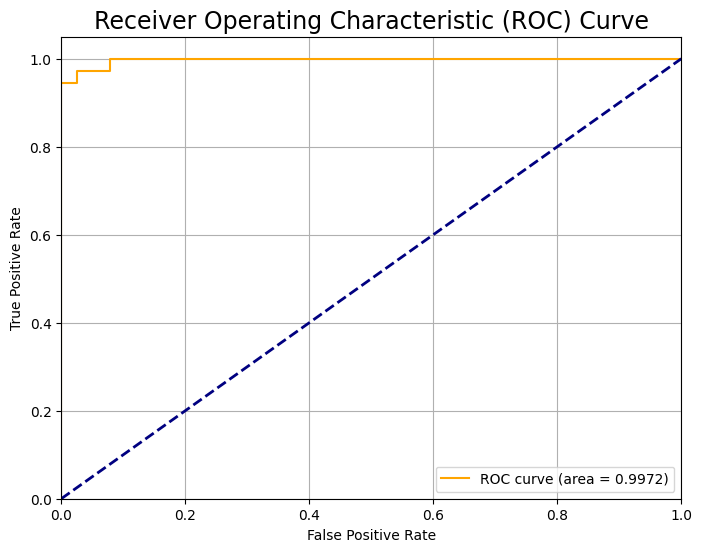

In [ ]:
from sklearn.metrics import  roc_curve, auc

prob = y_pred_proba
fpr , tpr, cutoff = roc_curve(y_test, prob[:,1] ) # taking only class 1's or Malignant tumor's probability
roc_auc = auc(fpr, tpr)

print(f"area under the curve is: {roc_auc:.5f}")

plt.figure(figsize=(8,6))

#plot Receiver Operating Characteristic
plt.plot(fpr, tpr,color = 'orange', label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=17)
plt.grid()
plt.show()

#**Interpretation**
The above curve shows how the model's performance changes with different thresholds.

* A higher curve means better model performance.

* The AUC value gives us a single number to summarize this performance — higher is better!
* in this case area is almost near to 1 so our model is performing well

#**Precision, Recall, and Accuracy Trade-off Analysis**
 we analyze how threshold probability affects the model's performance by plotting **precision, recall, and accuracy** against a range of thresholds from 0 to 1.  
  
By default, classification models in scikit-learn use a **0.5 threshold** to convert probabilities into class predictions. However, depending on the application — especially in sensitive tasks like breast cancer detection — using a custom threshold may yield better results by balancing **false positives and false negatives.**

#What We Did ?
* We calculated **precision, recall**, and **accuracy** for 500 different thresholds between 0 and 1.

* We then found the **optimal threshold (=0.3026)** — the point where all three metrics are the most balanced.
   
* The best threshold is identified by minimizing the total difference between precision, recall, and accuracy.  

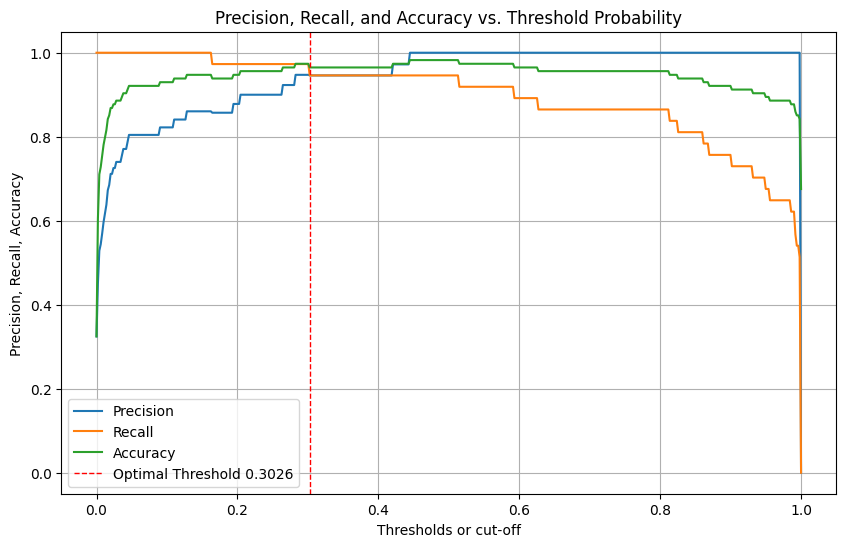

In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, accuracy_score


# Calculate precision, recall, and accuracy for different threshold probabilities
thresholds = np.linspace(0,1,500)

precisions = []
recalls = []
accuracies = []

for th in thresholds:
    y_pred_threshold = ( prob[:,1]  >= th).astype(int)

    precision = precision_score(y_test, y_pred_threshold)
    recall = recall_score(y_test, y_pred_threshold)
    accuracy = accuracy_score(y_test, y_pred_threshold)

    precisions.append(precision)
    recalls.append(recall)
    accuracies.append(accuracy)

# Finding the optimal threshold value
# We want to minimize the sum of absolute differences between precision, recall, and accuracy
diff = np.abs(np.array(precisions) - np.array(recalls)) + np.abs(np.array(precisions) - np.array(accuracies)) + np.abs(np.array(recalls) - np.array(accuracies))

# finding the optimal cutoff point
closest_threshold_index = np.argmin(diff)
optimal_threshold = thresholds[closest_threshold_index]

# Plot precision, recall, and accuracy against threshold probabilities
# precision, recall, and accuracy trade off
plt.figure(figsize=(10, 6))

plt.plot(thresholds, precisions, label='Precision')
plt.plot(thresholds, recalls, label='Recall')
plt.plot(thresholds, accuracies, label='Accuracy')
plt.axvline(x=optimal_threshold, color='r', linestyle='--', label=f'Optimal Threshold {optimal_threshold:.4f}', linewidth = 1)  # optimal thersehold vertical line

plt.xlabel("Thresholds or cut-off")
plt.ylabel("Precision, Recall, Accuracy")
plt.title('Precision, Recall, and Accuracy vs. Threshold Probability')
plt.legend()
plt.grid()
plt.show()